In [23]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
#import and read data
df = pd.read_csv(r'/content/hotel_bookings.csv')
head = df.head()
head

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [25]:
#drop some columns
df.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)
head

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [26]:
df.shape

(119390, 29)

In [27]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_week_number,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0
meal,0


In [28]:
#drop nulls in country column
df.dropna(subset = ["country"], axis=0, inplace=True)
df["country"]

,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [29]:
#drop nulls in agent column
df.dropna(subset=["agent"], axis=0, inplace=True)
df["agent"]

,agent
3,304.0
4,240.0
5,240.0
7,303.0
8,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [30]:
#missing numbers in company are equal to agent numbers
df["company"].fillna(df["agent"], inplace=True)
df["company"]

,company
3,304.0
4,240.0
5,240.0
7,303.0
8,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [31]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_week_number,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,2
babies,0
meal,0


In [32]:
df.dropna(subset=["children"], axis=0, inplace=True)

In [33]:
df.dtypes

,0
hotel,object
is_canceled,object
lead_time,int64
arrival_date_week_number,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
babies,int64
meal,object


In [36]:
df[['company','agent','children']] = df[['company','agent','children']].astype('int64')

In [37]:
df.dtypes

,0
hotel,object
is_canceled,object
lead_time,int64
arrival_date_week_number,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,int64
babies,int64
meal,object


In [38]:
df.describe()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,111.740092,27.339155,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,86.670992,2.619579,104.679911,0.053035,0.605458
std,107.681013,13.279990,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,110.863247,18.797440,50.021697,0.225359,0.799342
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,26.000000,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,79.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,169.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,629.000000,53.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [39]:
df['hotel'].value_counts()

,count
hotel,
City Hotel,71181
Resort Hotel,31713


Text(0.5, 1.0, 'Hotel bins')

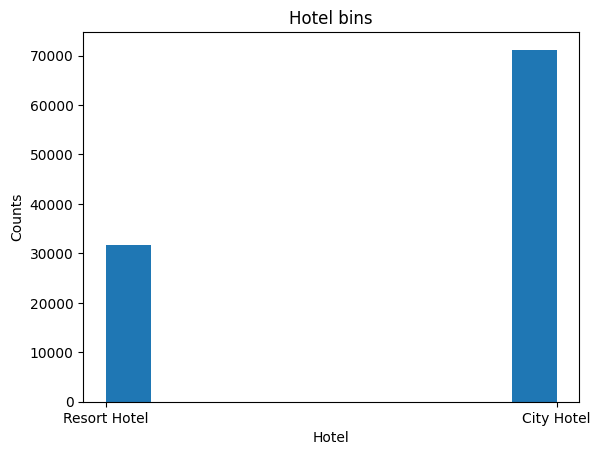

In [40]:
import matplotlib.pyplot as plt
plt.hist(df['hotel'])
plt.xlabel('Hotel')
plt.ylabel('Counts')
plt.title('Hotel bins')

Text(0.5, 1.0, 'Hotels Pie Chart')

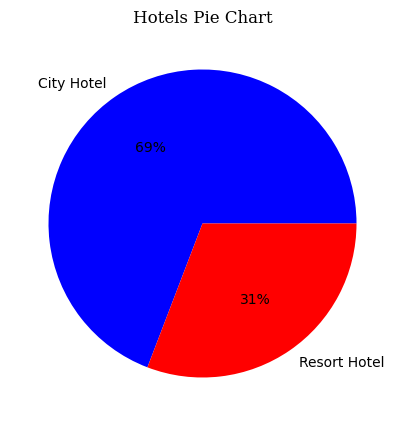

In [42]:
quantity =[71181,31713]
hotels =['City Hotel','Resort Hotel']
colors = ['blue','red']
plt.figure(figsize=(8,5))
plt.pie(quantity,labels=hotels,colors=colors,autopct='%.0f%%')
plt.title('Hotels Pie Chart', fontdict={'fontname':'serif','fontsize':12})

Text(0.5, 1.0, 'Meal bins')

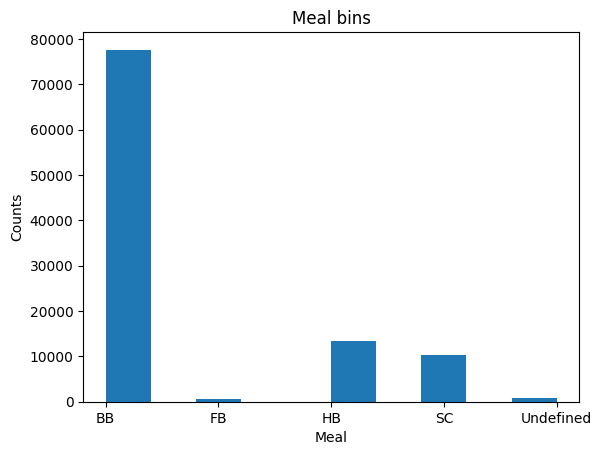

In [45]:
import matplotlib.pyplot as plt
plt.hist(df['meal'])
plt.xlabel('Meal')
plt.ylabel('Counts')
plt.title('Meal bins')

In [46]:
df.to_csv(r'/content/clean_hotel_bookings.csv')